## DDA3020 Autumn 2023 Homework 1 

### Programming Part 1：Polynomial Regression

--------------------------------------------------------------------------------------------------------------------------

In this exercise, we will try to fit a non-linear function $g$ with polynomial regression on the feasible space $\mathbf{X} = [0,11]$: 
$$\text{Unknown} \quad g(x) = ?$$ 
$$\text{Construct} \quad f(x) = \sum_{i=0}^n \alpha_i x^i \quad \Longleftrightarrow \quad f(x) = w^Tx',\quad x' = \begin{bmatrix} 1\\x\\x^2\\\vdots\\x^n\end{bmatrix},\quad s.t. \quad \forall x\in \mathbf{X}, \quad f(x) \approx g(x) $$ 
Where $n$ is the polynomial degree of freedom and is manually chosen.

--------------------------------------------------------------------------------------------------------------------------

In [2]:
import numpy as np
import matplotlib.pyplot as plt


We will use 17 noised samples to try to construct $f$.

In [3]:
x = np.array([ 0.    ,  0.6875,  1.375 ,  2.0625,  2.75  ,  3.4375,  4.125 , 4.8125,  5.5   ,  6.1875,  6.875 ,  7.5625,  8.25  ,  8.9375, 9.625 , 10.3125, 11.    ])
y = np.array([ -4.4282,   5.3943,   1.2416,  -5.9952,   3.1727,  18.6035, -3.2577,  -4.3593, -14.3989, -41.4483, -41.7916, -16.6214, 33.3262,  66.5037,  87.59  ,  64.3216,  10.4986])

#### 1. (1 point) 

(1) Define the function to calculate $\hat{w}$ directly from $X$, $y$ and $\lambda$:

$$\hat{w} = \arg\min_{w}\|Xw-y\|^2+\lambda\|w\|^2 \quad \Rightarrow\quad \hat{w} = (X^TX+\lambda I)^{-1}X^Ty$$

   - _Hint_: You are allowed to use _np.linalg.inv_ to calculate the inverse of a matrix.


In [4]:
def estimate_w(X,y,lambda_reg):
    #print(X.shape)
    idm = np.identity(X.shape[1])
    transpose_x = np.transpose(X)
    # print(transpose_x)
    # print(np.dot(transpose_x, X))
    inverse_m = np.linalg.inv(np.dot(transpose_x,X)+lambda_reg*idm)
    return np.dot(np.dot(inverse_m,transpose_x),y)


#### 2. (3 points)
(1) Take $n = 3$ and $lambda = 0$. Solve the problem.

(2) Display your $\hat{y} = X\hat{w}$ as well as the given $y$. You are supposed to see:

<!-- ![pic1](hw1.png) -->
<img src = 'hw1.png' width = 40% height = 40% />


 - _Hint_: the mean squared error of this solution $\frac{(\hat{y}-y)^2}{17} = 754.55$

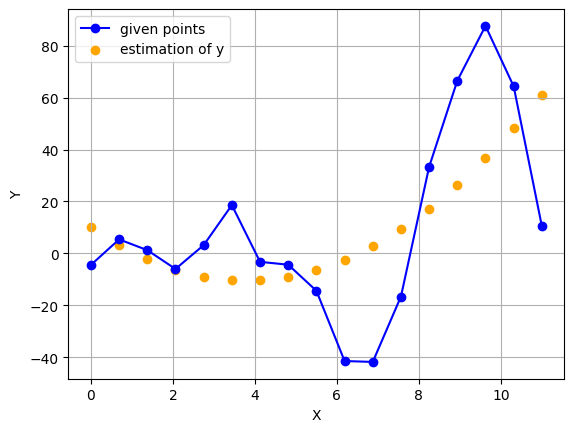

The mse eval is 754.55


In [5]:
n = 3
lambda_reg = 0.0
matrix_x = np.empty(x.shape)
matrix_x = np.column_stack([x**i for i in range(n+1)])

# print(matrix_x.shape)
est_w = estimate_w(matrix_x,y,lambda_reg)
est_y = np.dot(matrix_x,est_w)

# plot original (x,y)
plt.plot(x, y, label='given points', color='blue', marker='o',linestyle='-')
plt.scatter(x, est_y, label='estimation of y', color='orange', marker='o')

# Add labels and a title
plt.xlabel('X')
plt.ylabel('Y')


plt.legend()

# Show the plot
plt.grid(True)
plt.show()

mse = np.mean((y - est_y) ** 2)
formatted_output = f"{mse:.2f}"
print(f"The mse eval is {formatted_output}")

#### 3. (8 points) 

(1) Implement a grid search by changing the polynomial degree $n$ as well as the regularization parameter $\lambda$

(2) find the best mse (mean squared error) that you can reach. Print your best search mse.

In [6]:


degrees = [x for x in range(1,11)] # 1 to 10
#lambda_regs = [2**(n) for n in range(6)]
#lambda_regs.extend(0.5**(n) for n in range(1,5))
lambda_regs = [n for n in range(-5,5)]
min_degrees = 0
min_lamda = 0
min_results = float('inf')
min_est_w = None
results = []
for d in degrees:
    matrix_x = np.empty(x.shape)
    matrix_x = np.column_stack([x**i for i in range(d+1)])
    for lbd in lambda_regs:
        est_w = est_w = estimate_w(matrix_x,y,lbd)
        est_y = np.dot(matrix_x,est_w)
        mse = np.mean((y - est_y) ** 2)
        formatted_output = f"{mse:.2f}"
        print(f"The mse eval is {formatted_output}")
        results.append(mse)
        if mse < min_results:
            min_results = mse
            min_degrees = d
            min_lamda = lbd
            min_est_w = est_w
            print(f"min mse update {formatted_output}")


best_output = f"{min_results:.2f}"
print(f"best mse {best_output}")


The mse eval is 10677.61
min mse update 10677.61
The mse eval is 4915.00
min mse update 4915.00
The mse eval is 1236.03
min mse update 1236.03
The mse eval is 998.14
min mse update 998.14
The mse eval is 957.28
min mse update 957.28
The mse eval is 951.22
min mse update 951.22
The mse eval is 953.70
The mse eval is 958.35
The mse eval is 963.31
The mse eval is 967.98
The mse eval is 817.23
min mse update 817.23
The mse eval is 846.40
The mse eval is 981.47
The mse eval is 9904.76
The mse eval is 771.82
min mse update 771.82
The mse eval is 754.58
min mse update 754.58
The mse eval is 756.78
The mse eval is 759.69
The mse eval is 762.14
The mse eval is 764.17
The mse eval is 779.57
The mse eval is 780.97
The mse eval is 787.29
The mse eval is 814.85
The mse eval is 6587.70
The mse eval is 754.55
min mse update 754.55
The mse eval is 757.82
The mse eval is 760.49
The mse eval is 762.19
The mse eval is 763.35
The mse eval is 2427.44
The mse eval is 34203.44
The mse eval is 2308.60
The mse

#### 4. (1 point) 

(1) Display in 3D the results of your grid search.

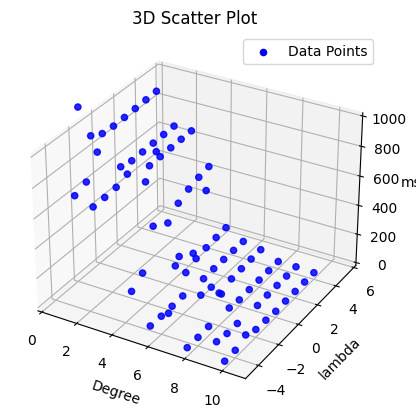

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

degrees_np = []

for d in range(len(degrees)):
    degrees_np.extend([degrees[d]]*len(degrees))

lambdas_np = []
for d in range(len(degrees)):
    lambdas_np.extend(lambda_regs)
X = np.array(degrees_np)  # X coordinates
Y = np.array(lambdas_np)  # Y coordinates
Z = np.array(results)  # Z coordinates

# Create a 3D figure and axis
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Create a 3D scatter plot
ax.scatter(X, Y, Z, c='b', marker='o', label='Data Points')
#ax.plot_trisurf(X, Y, Z)
# Add labels and title
ax.set_xlabel('Degree')
ax.set_ylabel('lambda')
ax.set_zlabel('mse')
ax.set_title('3D Scatter Plot')
ax.set_xlim(0, 11)  
ax.set_ylim(-5, 6) 
ax.set_zlim(0,1000) 

# Show the legend
ax.legend()

# Display the 3D plot
plt.show()


#### 5. (1 point) 

(1) Define the function $f$ that you found.


In [8]:
def f(x):
    matrix_x = np.empty(min_degrees)
    
    matrix_x = np.column_stack([x**i for i in range(min_degrees+1)])
    return np.dot(matrix_x,est_w)

#### 5. (6 points) 

(1) Load the 1000 points taken from the ground truth fuction $g$. You will find data on the range $x\in[-5,20]$.

(2) Display for $x\in [0,11]$:
 - Display $g$ in color 'C0' with the points that you loaded.
 - Scatter the given 17 samples in color 'C1'. 
 - Display (enough densely) your $f$ in color 'C2'.
 - Display the legend indicating the 3 plots. Specify the name for axis x and y.

(3) Repeat (2) for $x\in [-1,12]$

(4) Repeat (2) for $x\in [-2,13]$

(5) Give some comments on this work.

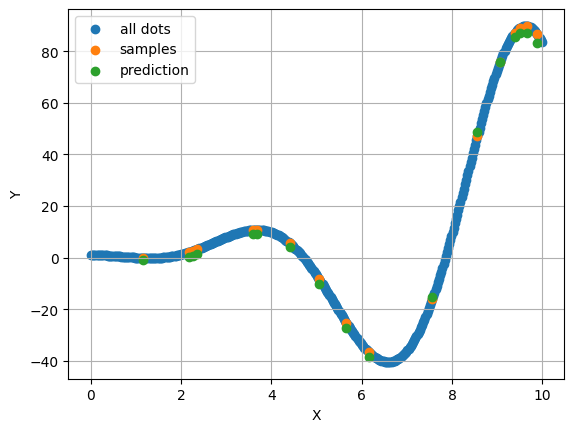

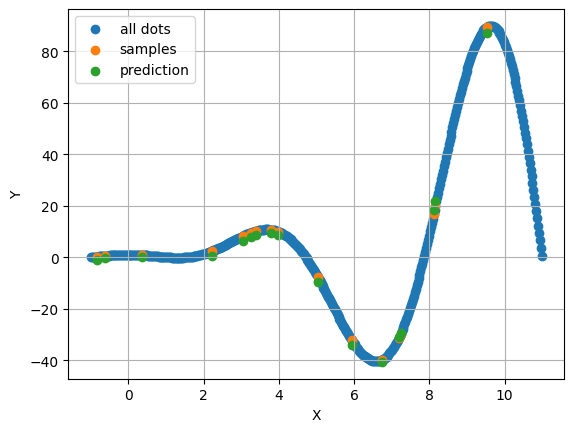

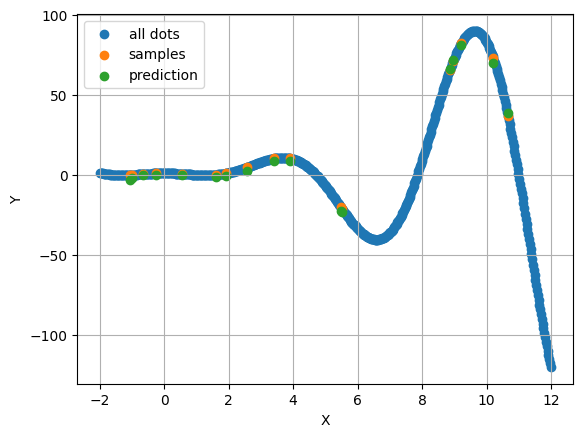

In [9]:
# load
import matplotlib.pyplot as plt
import pickle as pkl
import random
with open('ground truth function', 'rb') as m:
    x_real_g, y_real_g = pkl.load(m)
    m.close()
left = 0
right = 10 
colors = ['C0','C1','C2']

for i in range(3):
    list_x = []
    list_y = []
    for x in range(len(x_real_g)):
       
        if x_real_g[x] >= left-i and x_real_g[x] <= right+i:
            list_x.append(x_real_g[x])
            list_y.append(y_real_g[x])
    plt.scatter(list_x, list_y, label=f"all dots", color=colors[0], marker='o',linestyle='-')
    random_integers = random.sample(range(1, len(list_x)), 17)
    sample = [list_x[i] for i in random_integers]
    sample_g = [list_y[i] for i in random_integers]

    plt.scatter(sample, sample_g, label=f"samples", color=colors[1], marker='o',linestyle='-')
    predition = [f(i) for i in sample]
    plt.scatter(sample, predition, label=f"prediction", color=colors[2], marker='o',linestyle='-')

    # Add labels and a title
    plt.xlabel('X')
    plt.ylabel('Y')


    plt.legend()

            # Show the plot
    plt.grid(True)
    plt.show()



comments: